numpy + gpu + mlp == tensorflow  
numpy == gpu못씀 ㄸㄹㄹ  

tensor자체가 numpy기반...!

tensorflow로는 기계학습 가능  

bias 작다 == train data 랑 같다 == overfitting
overfitting 줄이는 방법 : learning curve , validation curve, cross validation, regularization, 앙상블

layer가 많을수록, 학습을 많이할수록 성능이 좋이지지만 overfitting문제가 일어날 수 있음  
하지만 일부러 overfitting시키는 경우도 있음 == 서울에서만 다니는 자동차(서울만 학습)
== 데이터 set이 변하지 않는 곳에서 사용가능

import keras vs import tensorflow차이점
import keras : tiano cntk, == 여러 백앤드 사용가능
import tensorflow 에서 keras는 무조건 keras만 사용가능

In [11]:
import tensorflow as tf

10개의 item을 구분하는 데이터

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# load patch make계열

In [13]:
type(X_train)

numpy.ndarray

In [ ]:
numpy에서 중요한 2개 shape, dtype

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
import matplotlib.pyplot as plt

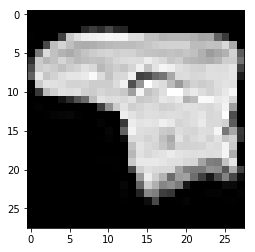

In [54]:
plt.imshow(X_train[0][::-1,:], cmap='gray')
# 비트맵그림은 행렬 연산으로 처리함

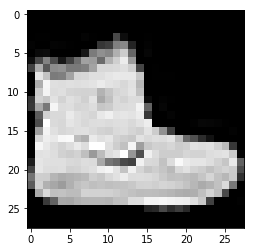

In [53]:
plt.imshow(X_train[0][:,::-1], cmap='gray')

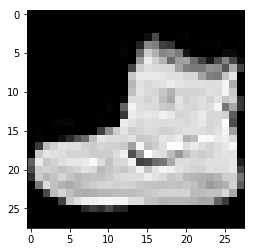

In [18]:
plt.imshow(X_train[0], cmap='gray')

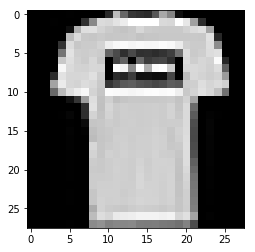

In [19]:
plt.imshow(X_train[1], cmap='gray')

# tensorflow에서 model불러오는 방식

품질 향상 : 학습많이하거나 layer를 더 쌓는다.  
    
모델이 복잡할수록(layer가 많을수록) : 데이터 많이 필요하고 overfitting이 잘 일어남, 학습속도 느려짐   
예측 : 행렬곱하기로 예측을 빨리한다.(학습은 느리지만 예측이 빠르다)  

속도가 느리다 == optimizer를 바꾼다.  
성능이 안좋다(안 정확하다) == normalize시킨다.

In [43]:
X_train, X_test = X_train/255., X_test/255.
# normalize로 성능향상 가능하다.
# 딥뉴런은 0과 1사이로 만들면 성능이 좋아진다.
# & predict할 때도 데이터 normalize해줘야 한다.

# 안하고 학습하면 성능 안좋아..

In [44]:
model = tf.keras.models.Sequential()

# scikit과 달리 import할 게 적다.

In [45]:
X_train.reshape(60000, -1).shape

# 1차원 만드는 numpy
# flatten : copy
# label : view == 볼레로

(60000, 784)

In [46]:
# scikit방식
from tensorflow.keras.models import Sequential 

# 모델 만들기
model = Sequential([
    # input을 변형하고 싶을때만 input layer사용, 변형 안해도 되면 input layer그냥 넣는다.
    tf.keras.layers.Flatten(input_shape=(28,28)), # 2차원 데이터 학습 못시켜서 1차원으로 만들어줌
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  # 노드 수, activation을 넣어줘야 함    
    # 객체를 직접 전달해서 나중에 수정 가능 & 객체 타입 상속받아서 나만의 activation 만들 수 있다.
    # activation='relu'처럼 전달 가능
    
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # 노드 수, activation을 넣어줘야 함    

    # tf.nn.relu : gradient vanishing문제를 해결해줌
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output의 수와 같게 만든다.
])
# layers=None : *가 아니므로, 여러개 넣어줘야 해서 list로 넣음 == layer"s"

In [47]:
# 전략
model.compile(optimizer='adam', # adam default객체를 넘김 , loss를 최적화시키는 함수...?
              loss='sparse_categorical_crossentropy',  # classification 이냐 regression이냐에 따라서 다름
              metrics=['accuracy'])  # metrics여러개 쓸 수 있다. == S
# loss : 실제값 예측값에 관한 함수 : 

In [48]:
model.fit(X_train, y_train, epochs=100)
# 학습 속도가 느리면 optimizer를 바꾼다.

# overfitting기준이 뭐가될까...?

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.9005 - accuracy: 0.6710
Epoch 2/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5793 - accuracy: 0.7886
Epoch 3/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5210 - accuracy: 0.8127
Epoch 4/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4814 - accuracy: 0.8271
Epoch 5/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4551 - accuracy: 0.8371
Epoch 6/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4331 - accuracy: 0.8447
Epoch 7/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4174 - accuracy: 0.8495
Epoch 8/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4046 - accuracy: 0.8543
Epoch 9/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3941 - accuracy: 0.8590
Epoch

60000/60000 [==============================] - 3s 56us/sample - loss: 0.1824 - accuracy: 0.9326
Epoch 77/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1813 - accuracy: 0.9320
Epoch 78/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1786 - accuracy: 0.9335
Epoch 79/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1794 - accuracy: 0.9335
Epoch 80/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1767 - accuracy: 0.9341
Epoch 81/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1748 - accuracy: 0.9354
Epoch 82/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1744 - accuracy: 0.9354
Epoch 83/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1741 - accuracy: 0.9355
Epoch 84/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1717 - accuracy: 0.9359
Epoch 85/100
60000/60000 [======

In [49]:
loss, acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3875 - accuracy: 0.8817


In [51]:
loss, acc

(0.38753121821880343, 0.8817)

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
